# Question 1a: Segmentation using NCut:

In [ ]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from cv2 import resize,cvtColor
import cv2
from scipy.spatial.distance import pdist,squareform
from scipy.sparse.linalg import eigs

In [ ]:
#Loading Images
dog = np.array(io.imread("/content/dog.jpeg"))
sunset = np.array(io.imread("/content/sunset.jpeg"))
books = np.array(io.imread("/content/books.jpeg"))
bird = np.array(io.imread("/content/bird.jpeg"))


# Functions:

## 1. Computing Similarity and Degree Matrix

In [ ]:
def compute_matrix(image,sigma1,sigmaX,r):
  M,N,_ = image.shape

  coordinates = []   # Array to hold coordinates
  parameters = [] # Array to hold parameters
  similarity_matrix = np.zeros((M*N,M*N))

  for row in range(M):
    for column in range(N):
      coordinates.append([row,column])
      parameters.append(list(image[row][column]))


  distance_pdist = pdist(coordinates,'euclidean')
  distance_squareform = squareform(distance_pdist)


  parameter_pdist = pdist(parameters,'euclidean')
  parameter_squareform = squareform(parameter_pdist)

  # Computing similarity matrix
  for i in range(M*N):
    for j in range(M*N):
      feature_norm = parameter_squareform[i][j]
      spatial_norm = distance_squareform[i][j]

      if spatial_norm <= r:
        similarity_matrix[i][j] = np.exp(-feature_norm**2/sigma1) * np.exp(-spatial_norm**2/sigmaX)
      else:
        similarity_matrix[i][j] = 0

  # Computing diagonal matrix
  row_sum = np.sum(similarity_matrix,axis = 1)
  degree_matrix = np.diag(row_sum)

  return similarity_matrix,degree_matrix


## 2. Computing Segments

In [ ]:
def compute_segment(W,D,image):
  eigenValues, eigenVectors = eigs(D-W, k=2, M=D, which="SM")
  y1 = eigenVectors[:,1]
  y1 =  np.real(y1)

  # Computing X array from Y array:

  # Computing mean
  tau = np.mean(y1)
  X = []
  for i in range(len(y1)):
    if y1[i] >= tau:
      X.append(1)
    else:
      X.append(-1)

  M,N,_ = image.shape
  X = np.array(X)
  X_matrix = X.reshape(M,N)

  return X_matrix



## 3. Displaying:

In [ ]:
def get_colors(X_image, original_image):

  # Find coordinates of +1 and -1 values
  plus_one_coords = np.where(X_image == 1)
  minus_one_coords = np.where(X_image == -1)

  # Calculate mean color for each region
  if plus_one_coords[0].size > 0:
    foreground_color = np.mean(original_image[plus_one_coords], axis=0)
  else:
    foreground_color = np.zeros_like(original_image[0])

  if minus_one_coords[0].size > 0:
    background_color = np.mean(original_image[minus_one_coords], axis=0)
  else:
    background_color = np.zeros_like(original_image[0])

  return foreground_color, background_color

In [ ]:
def display_image(X_image, original_image,image, foreground_color, background_color,similarity_matrix):

  # Create a copy of the original image to avoid modifying it
  displayed_image = original_image.copy()

  # Replace pixel values based on X_image values
  displayed_image[X_image == 1] = foreground_color
  displayed_image[X_image == -1] = background_color
  displayed_image = resize(displayed_image,(image.shape[0],image.shape[1]))

  fig,axes = plt.subplots(1, 2,figsize=(20, 5))
  axes[0].imshow(displayed_image,aspect='auto')
  axes[0].axis('off')
  axes[0].set_title("Segmented Image")
  axes[1].imshow(similarity_matrix,aspect='auto')
  axes[1].set_title("Similarity Matrix")

  plt.show()
  return displayed_image


## Main Function:

In [ ]:
def segmentation(image,sigma1,sigmaX,r):

  image_resized = resize(image,(64,64))

  # Compute similarity and degree matrices
  similarity_matrix,degree_matrix = compute_matrix(image_resized,sigma1,sigmaX,r)
  # Compute segment map
  segment_map = compute_segment(similarity_matrix,degree_matrix,image_resized)
  # Calculate foreground and background colors
  foreground_color, background_color = get_colors(segment_map, image_resized)
  # Display segmented image
  display_image(segment_map, image_resized,image, foreground_color, background_color,similarity_matrix)

# Similarity Measure 1 (RGB Values):

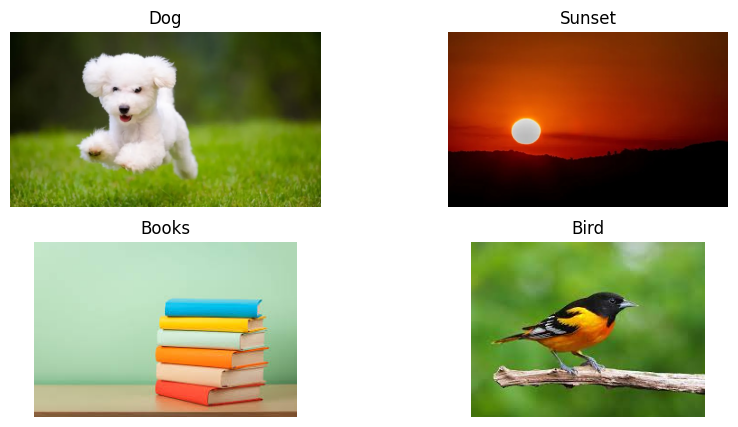

In [ ]:
fig,axes = plt.subplots(2, 2,figsize=(10, 5))
axes[0, 0].imshow(dog)
axes[0, 0].axis('off')
axes[0, 0].set_title("Dog")
axes[0, 1].imshow(sunset)
axes[0, 1].axis('off')
axes[0, 1].set_title("Sunset")
axes[1, 0].imshow(books)
axes[1, 0].axis('off')
axes[1, 0].set_title("Books")
axes[1, 1].imshow(bird)
axes[1, 1].axis('off')
axes[1, 1].set_title("Bird")

plt.show()

## Implementation

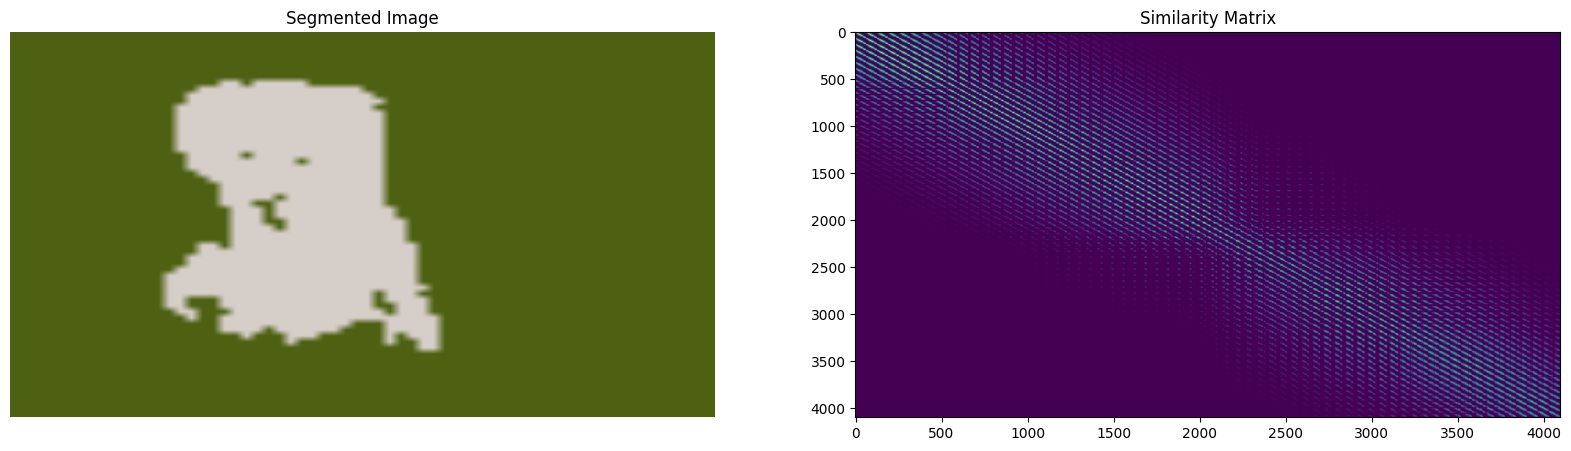

In [ ]:
segmentation(dog,1500,150,50)

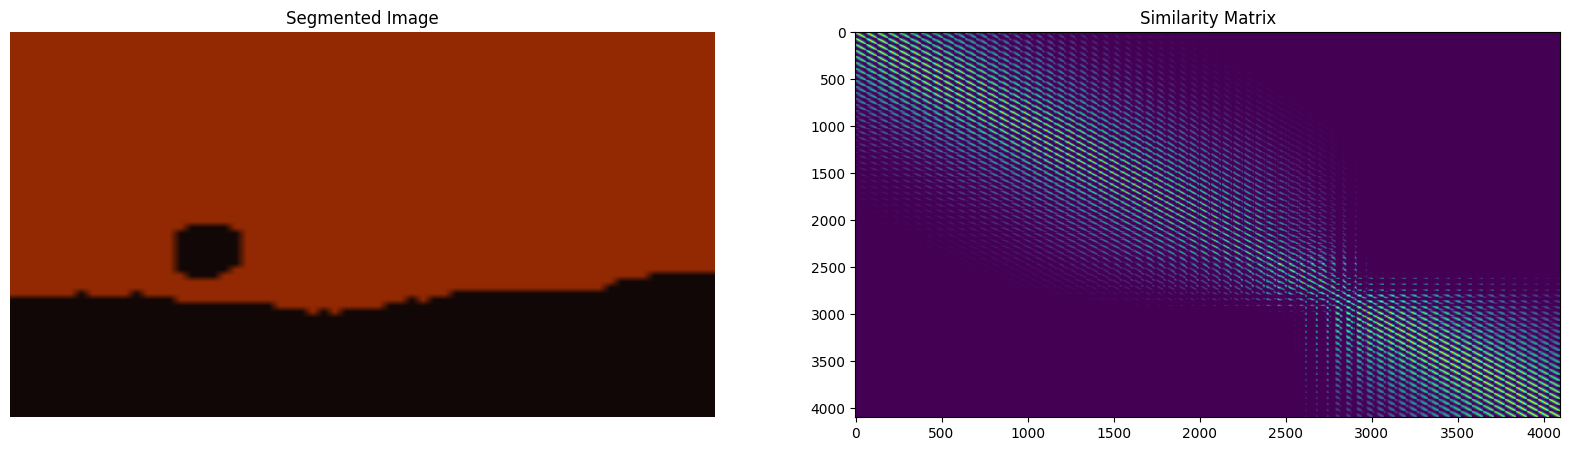

In [ ]:
segmentation(sunset,1500,220,50)

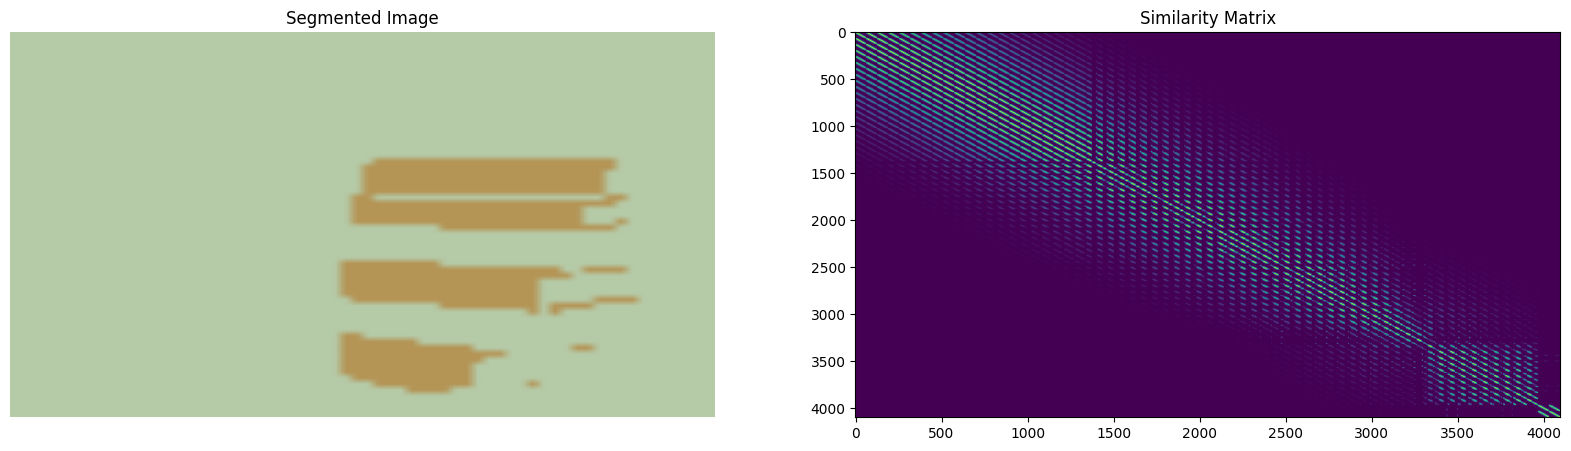

In [ ]:
segmentation(books,1100,120,50)

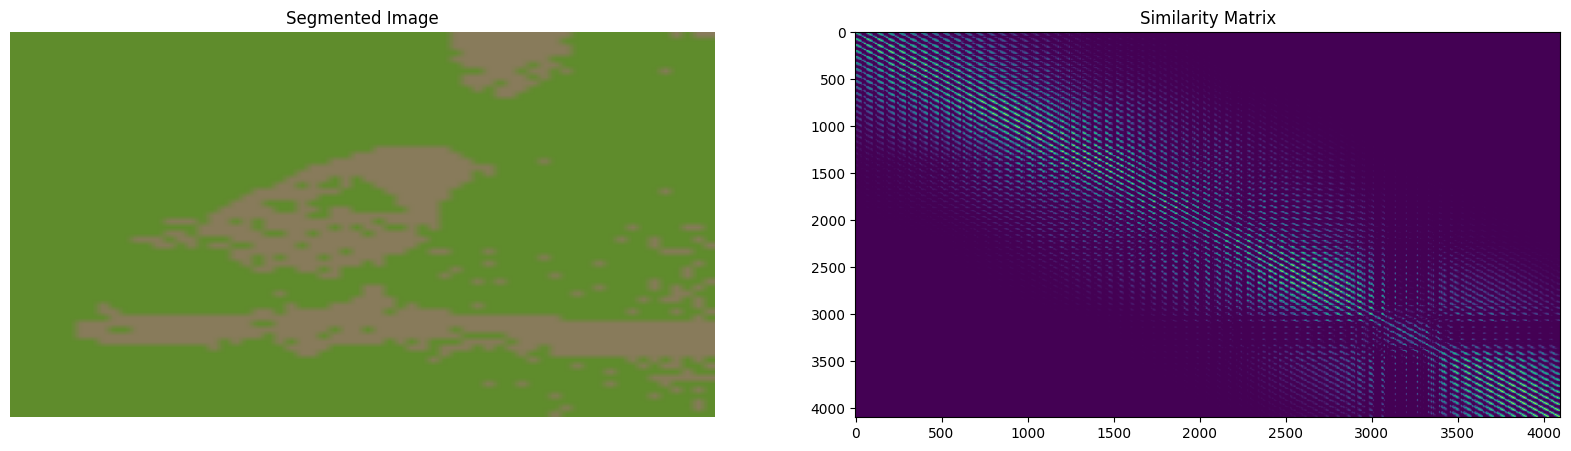

In [ ]:
segmentation(bird,1400,180,50)

# Similarity Measure 2 (HSV Measure):

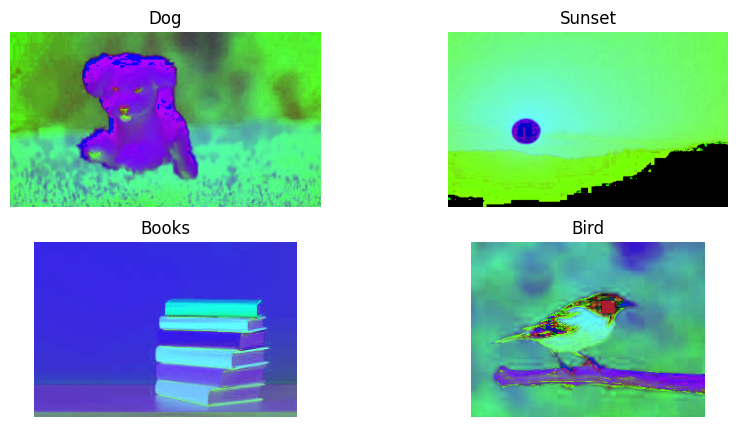

In [ ]:
dog_hsv = cvtColor(dog, cv2.COLOR_BGR2HSV)
sunset_hsv = cvtColor(sunset, cv2.COLOR_BGR2HSV)
books_hsv = cvtColor(books, cv2.COLOR_BGR2HSV)
bird_hsv = cvtColor(bird, cv2.COLOR_BGR2HSV)

fig,axes = plt.subplots(2, 2,figsize=(10, 5))
axes[0, 0].imshow(dog_hsv)
axes[0, 0].axis('off')
axes[0, 0].set_title("Dog")
axes[0, 1].imshow(sunset_hsv)
axes[0, 1].axis('off')
axes[0, 1].set_title("Sunset")
axes[1, 0].imshow(books_hsv)
axes[1, 0].axis('off')
axes[1, 0].set_title("Books")
axes[1, 1].imshow(bird_hsv)
axes[1, 1].axis('off')
axes[1, 1].set_title("Bird")

plt.show()

## Implementation:

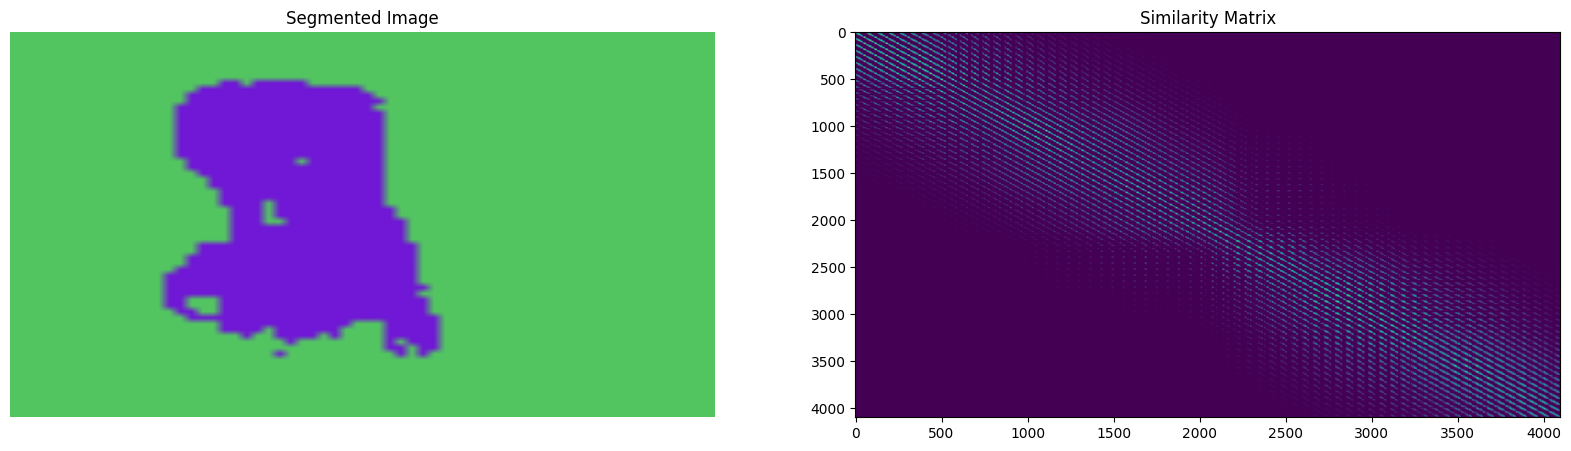

In [ ]:
segmentation(dog_hsv,1500,150,50)

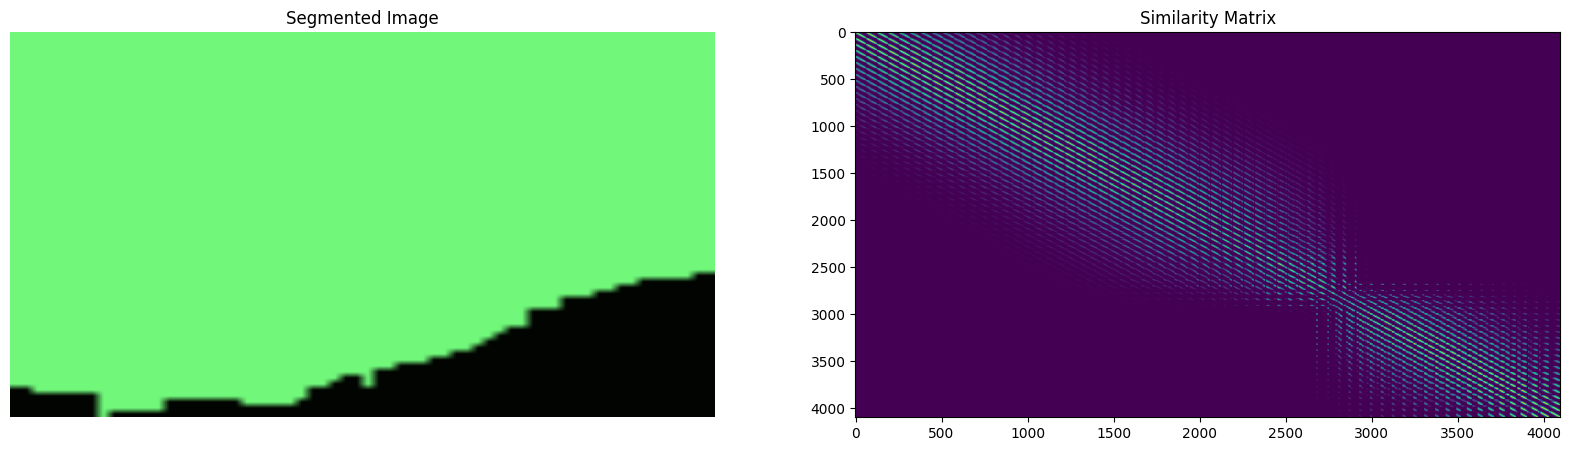

In [ ]:
segmentation(sunset_hsv,1300,120,50)

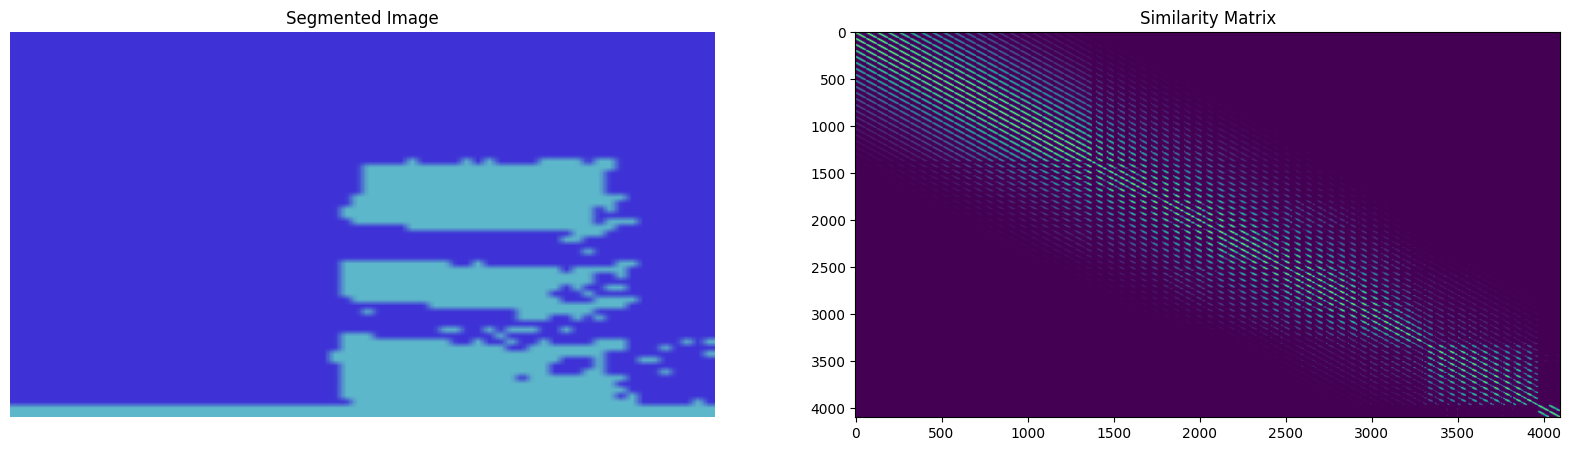

In [ ]:
segmentation(books_hsv,1000,100,50)

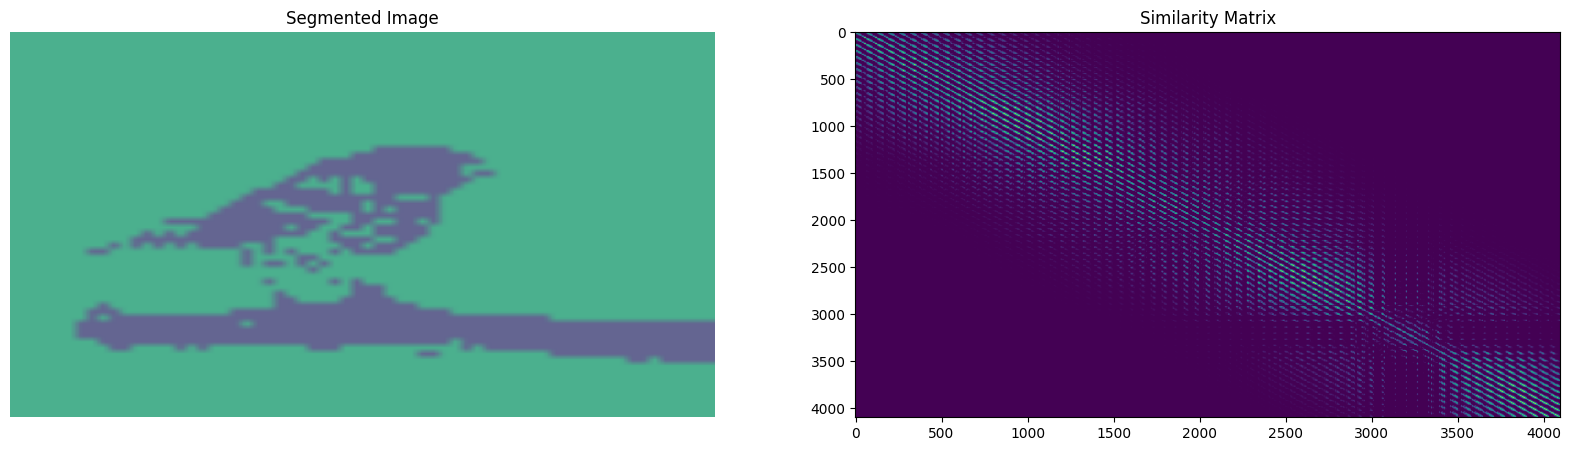

In [ ]:
segmentation(bird_hsv,1000,150,50)

# More than 2 segments:

## Functions:

In [ ]:
def compute_segment_xtra(W,D,image):
  eigenValues, eigenVectors = eigs(D-W, k=4, M=D, which="SM")
  y = np.real(eigenVectors)

  # Computing X array from Y array:
  X = []
  for i in range(len(y)):
    if y[i][1] >= np.mean(y[:,1]) and y[i][2] >= np.mean(y[:,2]):
      X.append(1)
    elif y[i][1] >= np.mean(y[:,1]) and y[i][2] < np.mean(y[:,2]):
      X.append(2)
    elif y[i][1] < np.mean(y[:,1]) and y[i][2] >= np.mean(y[:,2]):
      X.append(3)
    else:
      X.append(4)

  M,N,_ = image.shape
  X = np.array(X)
  X_matrix = X.reshape(M,N)

  return X_matrix


In [ ]:
def get_colors_xtra(X_image, original_image):
  # Find coordinates of each segment
  segment_coords = [np.where(X_image == i) for i in range(1, 5)]

  # Calculate mean color for each segment
  segment_colors = []
  for coords in segment_coords:
    if coords[0].size > 0:
      segment_colors.append(np.mean(original_image[coords], axis=0))
    else:
      segment_colors.append(np.zeros_like(original_image[0]))

  return segment_colors

def display_image_xtra(X_image, original_image, image, segment_colors):
  # Create a copy of the original image to avoid modifying it
  displayed_image = original_image.copy()

  # Replace pixel values based on X_image values
  for i in range(1, 5):
    displayed_image[X_image == i] = segment_colors[i-1]

  displayed_image = resize(displayed_image, (image.shape[0], image.shape[1]))
  plt.imshow(displayed_image)
  plt.axis('off')
  plt.show()


In [ ]:
def segmentation_xtra(image,sigma1,sigmaX,r):

  image_resized = resize(image,(64,64))

  # Compute similarity and degree matrices
  similarity_matrix,degree_matrix = compute_matrix(image_resized,sigma1,sigmaX,r)
  # Compute segment map
  segment_map = compute_segment_xtra(similarity_matrix,degree_matrix,image_resized)
  # Calculate foreground and background colors
  segment_colors = get_colors_xtra(segment_map, image_resized)
  # Display segmented image
  display_image_xtra(segment_map, image_resized, image, segment_colors)

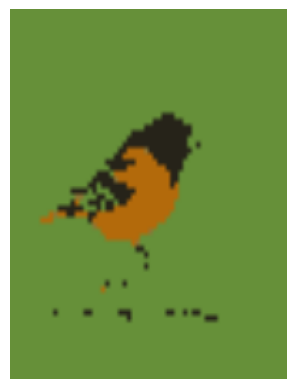

In [ ]:
segmentation_xtra(bird,1400,180,50)

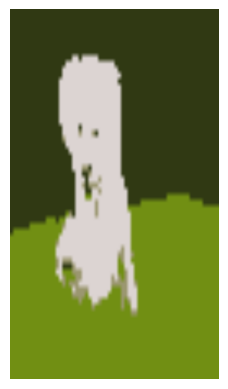

In [ ]:
segmentation_xtra(dog,1400,180,50)

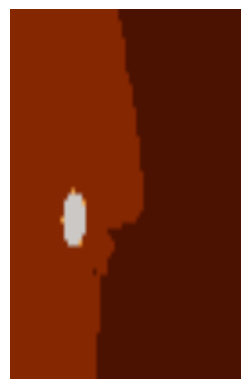

In [ ]:
segmentation_xtra(sunset,1400,180,50)

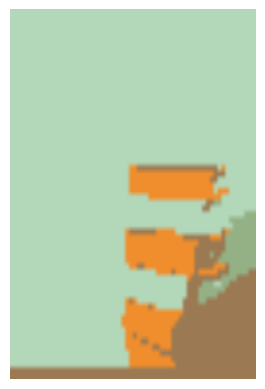

In [ ]:
segmentation_xtra(books,1400,180,50)